In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [2]:
con=pd.read_csv('Concrete_Data.csv')
con.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [3]:
x=con.iloc[:,0:8].values
y=con.iloc[:,-1].values
print(x.shape)
#y=y.reshape(-1,1)
print(y.shape)

(1030, 8)
(1030,)


Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)'],
      dtype='object')


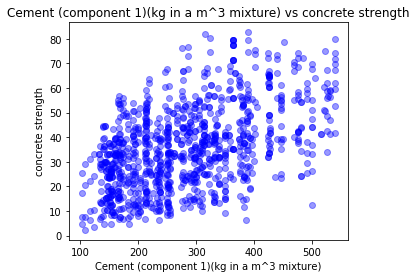

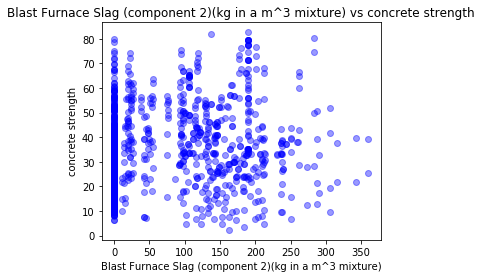

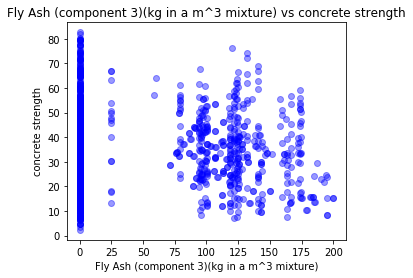

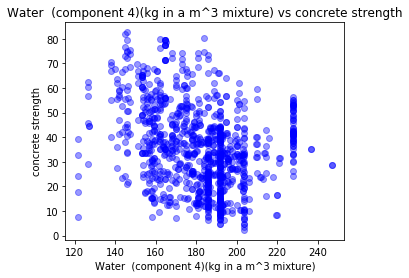

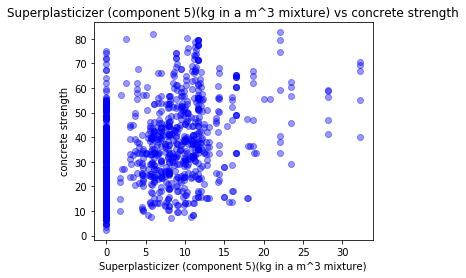

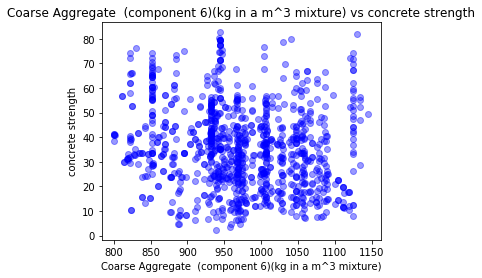

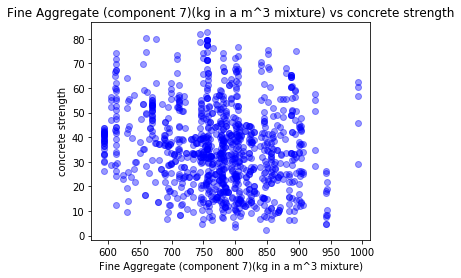

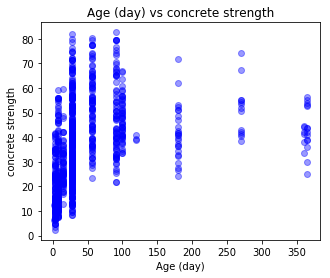

In [4]:
con1=con.iloc[:,0:8]
cols=con1.columns
print(cols)
#con[cols[0]].head()
def plot_scatter(cols):
    y_ax=y
    for col in cols:
        x_ax=con[col]
        plt.figure(figsize=(5,4))
        plt.title(col+' vs '+'concrete strength')
        plt.xlabel(col)
        plt.ylabel('concrete strength')
        plt.scatter(x_ax,y_ax,alpha=0.4,color='b')
        plt.show()
plot_scatter(cols)

In [5]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.30,random_state=40)
from math import sqrt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
model=RandomForestRegressor(n_estimators=100)
model.fit(xtrain,ytrain)
score=model.score(xtrain,ytrain)
pred=model.predict(xtest)
print('The machine learning score is:',score)
mse=mean_squared_error(pred,ytest)# mean square error
rmse=sqrt(mean_squared_error(pred,ytest)) # root mean squared error
print('The mean squared error is:',mse)
print('The mean squared error is:',rmse)
#print('The accuracy score is:',precision_score(ytest,pred))



The machine learning score is: 0.98376408813642
The mean squared error is: 29.84929189813541
The mean squared error is: 5.463450548704126


In [6]:
# random forest regressor using cross validation techniques to improve the learning score
from sklearn.model_selection import KFold 
kf = KFold(n_splits=10, random_state=None) 

for train_index, test_index in kf.split(x):
      #print("Train:", train_index, "Validation:",test_index)
      x_train, x_test = x[train_index], x[test_index] 
      y_train, y_test = y[train_index], y[test_index]
model=RandomForestRegressor(n_estimators=200, random_state=45)
model.fit(x_train,y_train)
scores=model.score(x_train,y_train)
pred=model.predict(x_test)
print('the ml score per iteration is:',scores)


the ml score per iteration is: 0.9848850790309477
